### Level Ten Trading Strategy

In this note it simulates and calculates how the trading strategy performs.

#### Trading Strategy

Ticker: ***SPY***

Option exp: ***0 DTE***

**Trading Rule**
1. Start acct with \$1000
2. Take position size of \$500 each trade
4. The trade position size doubles when the acct goes up by \$2000
3. Have a -10% stop loss
4. If the postion is over 15% in profit then move the stoploss to +10\%
4. Close position when profit is 50% or more

**The strategy odds:**
1. 40% chance of hitting the stop loss of -10%
2. 20% chance of hitting 10% profit
3. 40% chance of hitting 50% profit

In [42]:
import numpy as py
import math
import matplotlib.pyplot as plt

In [43]:
plt.rcParams["figure.figsize"] = (8,8)

##### Trading strategy parmaters

In [44]:
# 0: Stoploss -10% 
# 1: +10% profit 
# 2: +50% profit

outcomes = py.arange(0,3)
probality = [0.4, 0.2, 0.4]
returns = [-.10, .10, .50]

In [48]:
# Picks an random outcome for a given trade.
def get_trade_outcome():
    return returns[py.random.choice(outcomes, p=probality)]

In [57]:
def run_strategy():

    acct_balance = 1000
    num_of_trades = 40
    trade_initial_size = 500 # In dollars
    trade_size_increase_threshold = 2000 # When the trade size should increase.
    
    acct_returns = []

    for i in range(0, num_of_trades):

        if acct_balance < 500:
            print("Acct balance is below 500")
            break
            
        trade_position_size = trade_initial_size * math.ceil(acct_balance / trade_size_increase_threshold)
        
        acct_balance += trade_position_size * get_trade_outcome()

        acct_returns.append(math.floor(acct_balance))
        
        
    plt.plot(acct_returns)
    return acct_balance

##### Trade strategy projections

Min Gain:  1850.0
Max Gain:  45350.0
Mean Gain:  9848.05


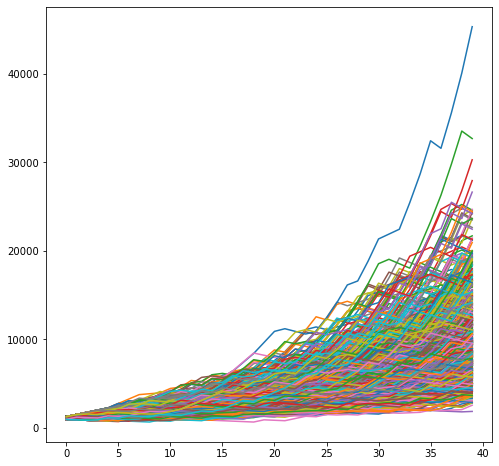

In [65]:
results = []

for i in range(0, 1000):
    results.append(run_strategy())
    
print("Min Gain: ", py.min(results))
print("Max Gain: ", py.max(results))
print("Mean Gain: ", py.mean(results))